In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Overview

In [5]:
df_train = pd.read_csv("data/train.csv", index_col=0)
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df_train.shape

(8693, 13)

In [ ]:
num_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df_train.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical features: ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']


In [8]:
null_counts = df_train.isnull().sum()
print(null_counts)

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
null_rows = df_train[df_train.isnull().any(axis=1)]

null_passenger_ids = null_rows.index.tolist()

print("Number of passengers with at least one null value:", len(null_passenger_ids))
print("Sample PassengerIds with nulls:", null_passenger_ids[:10])

Number of passengers with at least one null value: 2087
Sample PassengerIds with nulls: ['0006_02', '0008_02', '0012_01', '0014_01', '0020_03', '0020_05', '0022_01', '0024_01', '0031_03', '0036_01']


## Pre-Proccessing

In [12]:
for col in num_features:
    df_train[col].fillna(df_train[col].median(), inplace=True)
# Categorical -> mode
for col in cat_features:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_10808\1666943562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].median(), inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_10808\1666943562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [14]:
df = pd.get_dummies(df_train, columns=cat_features, drop_first=True)

In [16]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

## Data Visualization

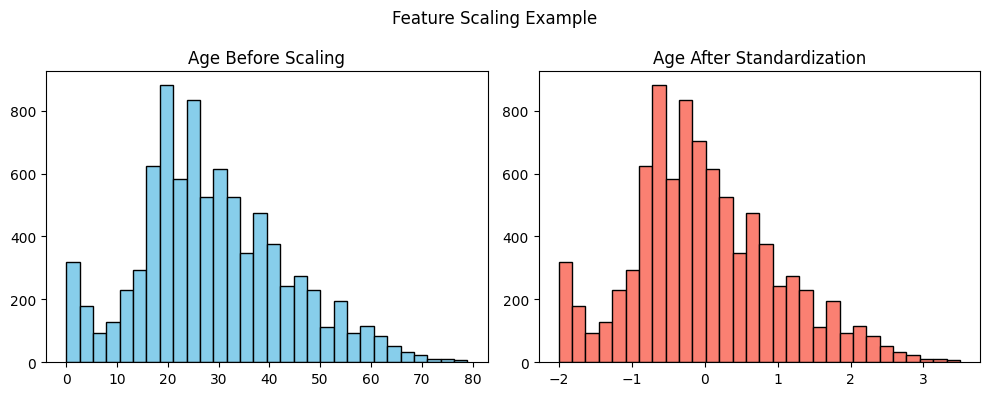

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

raw_age = pd.read_csv("data/train.csv")["Age"]  # original distribution
axs[0].hist(raw_age.dropna(), bins=30, color="skyblue", edgecolor="black")
axs[0].set_title("Age Before Scaling")

axs[1].hist(df["Age"], bins=30, color="salmon", edgecolor="black")
axs[1].set_title("Age After Standardization")

plt.suptitle("Feature Scaling Example")
plt.tight_layout()
plt.savefig("age_scaling.png", dpi=300)
plt.show()

looks good

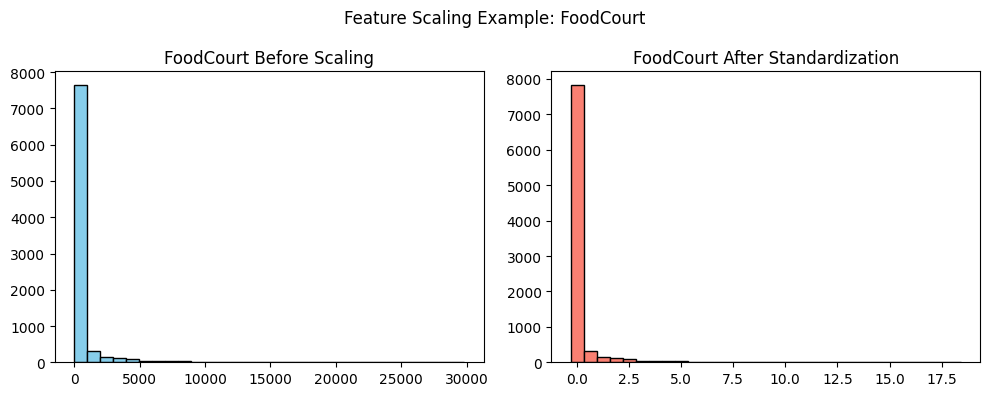

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

raw_foodcourt = pd.read_csv("data/train.csv")["FoodCourt"]
axs[0].hist(raw_foodcourt.dropna(), bins=30, color="skyblue", edgecolor="black")
axs[0].set_title("FoodCourt Before Scaling")

axs[1].hist(df["FoodCourt"], bins=30, color="salmon", edgecolor="black")
axs[1].set_title("FoodCourt After Standardization")

plt.suptitle("Feature Scaling Example: FoodCourt")
plt.tight_layout()
plt.savefig("foodcourt_scaling.png", dpi=300)
plt.show()

This feature is kinda questionable